In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

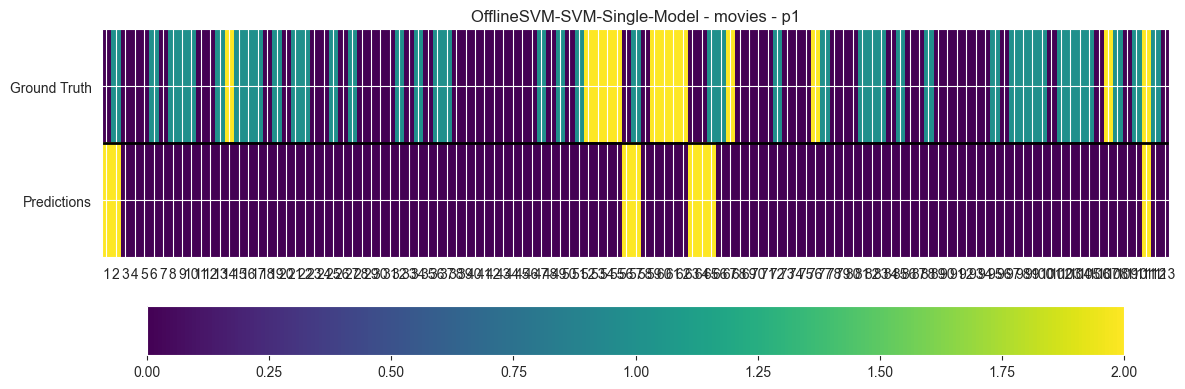

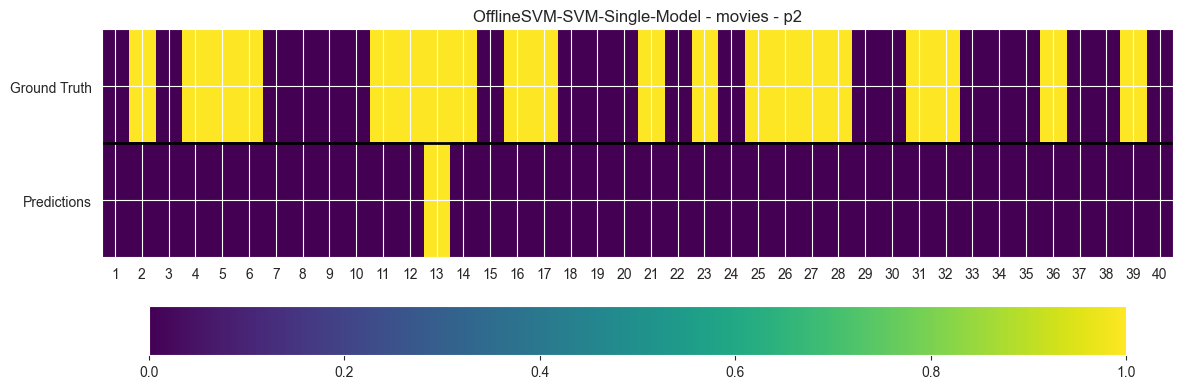

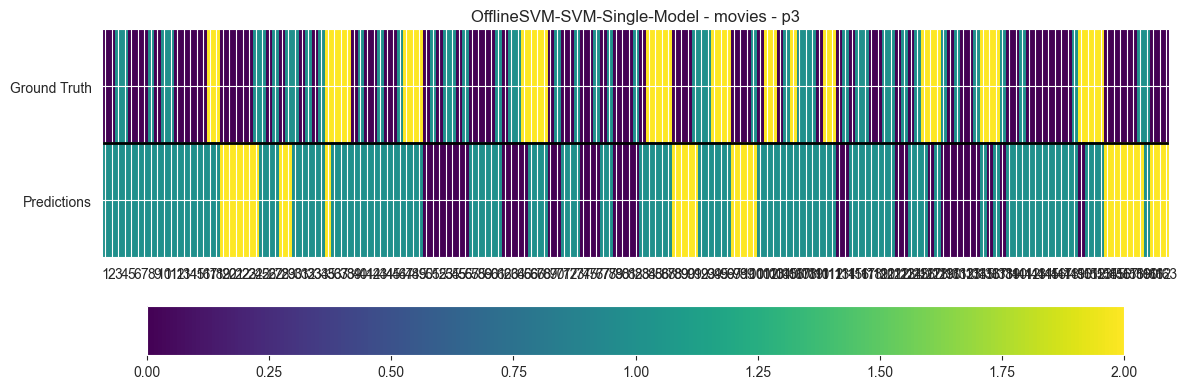

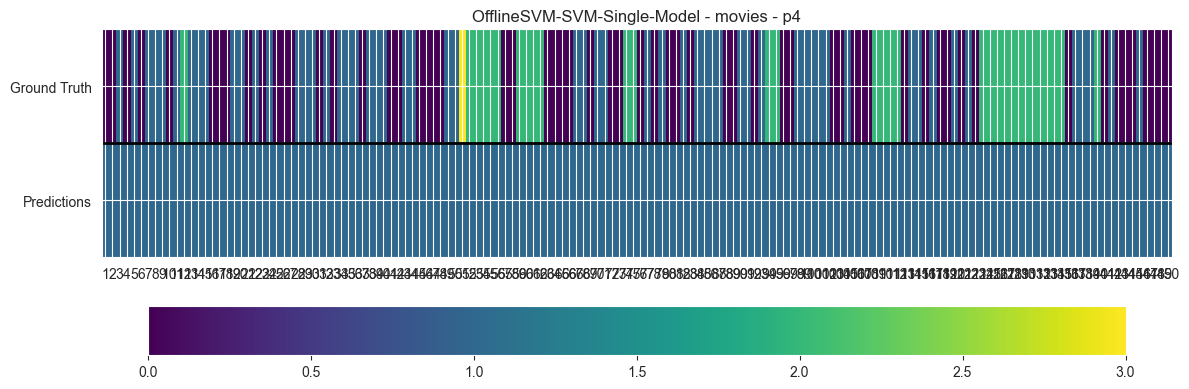

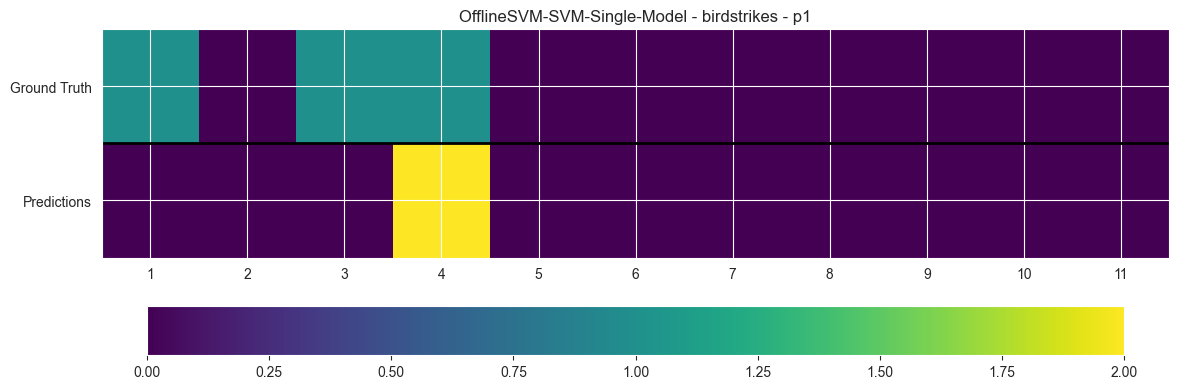

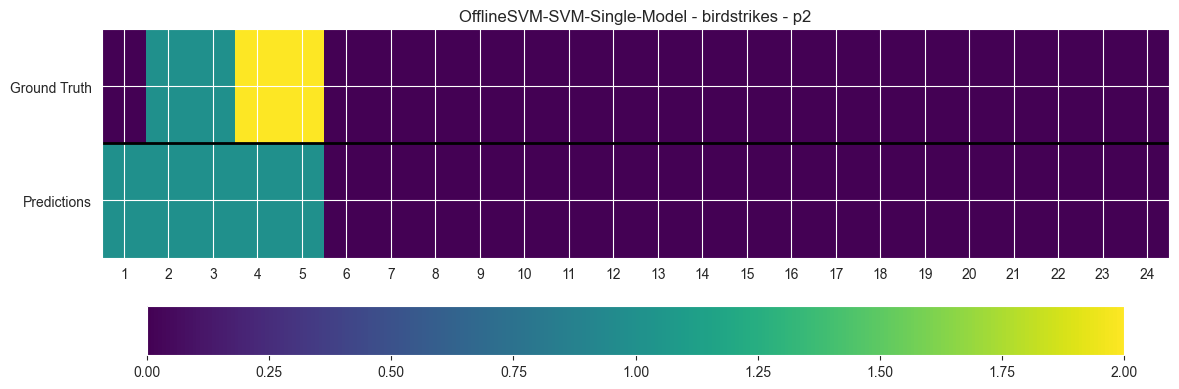

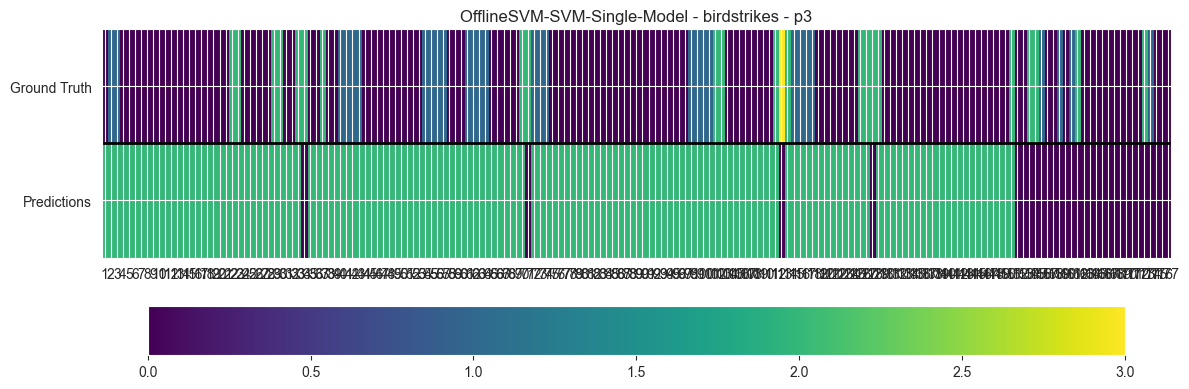

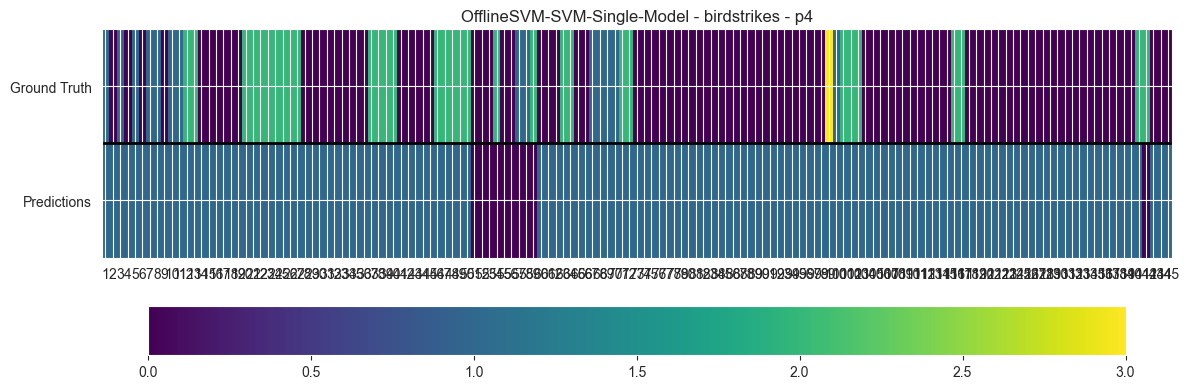

In [14]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# Function to convert categorical labels to numeric values
def convert_to_numeric(labels):
    label_mapping = {'same': 0, 'modify-1': 1, 'modify-2': 2, 'modify-3': 3}
    return [label_mapping.get(label, -1) for label in labels]

# Function to extract labels from the concatenated string
def extract_labels(label_string):
    # Use regular expression to find all instances of 'same', 'modify-1', 'modify-2', 'modify-3'
    return re.findall(r'same|modify-1|modify-2|modify-3', label_string)

# Read all algorithm results from csv files
datasets = ['movies', 'birdstrikes']
tasks = ['p1', 'p2', 'p3', 'p4']
algorithms = ['OfflineSVM-SVM-Single-Model']

for dataset in datasets:
    for task in tasks:
        for algorithm in algorithms:
            file_name = f"Experiments_Folder/VizRec/{dataset}/{task}/{algorithm}.csv"

            try:
                # Load results from CSV
                results = pd.read_csv(file_name)

                # Extract labels from concatenated strings
                predictions = extract_labels(results['Predictions'].iloc[0])
                ground_truth = extract_labels(results['Ground_Truth'].iloc[0])

                # Convert categorical data to numeric values
                predictions_numeric = convert_to_numeric(predictions)
                ground_truth_numeric = convert_to_numeric(ground_truth)

                # Combine ground truth and predictions into a single array
                # First row is ground truth, second row is predictions
                data = np.vstack([ground_truth_numeric, predictions_numeric])

                # Create the figure
                fig, ax = plt.subplots(figsize=(12, 4))

                # Plot the data with imshow
                ax.imshow(data, cmap='viridis', aspect='auto')

                # Customize plot
                ax.set_title(f"{algorithm} - {dataset} - {task}")
                ax.set_yticks([0, 1])
                ax.set_yticklabels(['Ground Truth', 'Predictions'])

                # Add a dark line to separate users visually
                ax.axhline(y=0.5, color='black', linewidth=2)

                # Set xticks to represent the number of predictions/actions
                ax.set_xticks(range(len(ground_truth_numeric)))
                ax.set_xticklabels(range(1, len(ground_truth_numeric) + 1))

                # Show color bar for reference
                plt.colorbar(ax.images[0], ax=ax, orientation='horizontal')

                plt.tight_layout()
                plt.show()

            except Exception as e:
                print(f"Error processing {file_name}: {e}")
